#                                                AQI-AIR QUALITY INDEX

## 1. Load dataset and read the dataset
-> import library\
-> load dataset\
-> reading as per data

In [1]:
#pip install pandas-profiling
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import preprocessing
from sklearn import ensemble
from pmdarima import auto_arima
from statsmodels.tsa.arima_model import ARIMA
from sklearn.preprocessing import LabelEncoder
from statsmodels.tsa.stattools import adfuller
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
#from pandas_profiling import ProfileReport
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import warnings
warnings.filterwarnings("ignore")
DeprecationWarning("ignore")
FutureWarning("ignore")

FutureWarning('ignore')

Load dataset and visualizing the raw data.

In [2]:
da=pd.read_csv("station_day.csv")
ds=pd.read_csv("stations.csv")

In [3]:
da.head(5)  # station_day

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,NaN,NaN
1,AP001,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2,AP001,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
3,AP001,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
4,AP001,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate


In [4]:
ds.head(5)  #station

,StationId,StationName,City,State,Status
0,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
1,AP002,"Anand Kala Kshetram, Rajamahendravaram - APPCB",Rajamahendravaram,Andhra Pradesh,NaN
2,AP003,"Tirumala, Tirupati - APPCB",Tirupati,Andhra Pradesh,NaN
3,AP004,"PWD Grounds, Vijayawada - APPCB",Vijayawada,Andhra Pradesh,NaN
4,AP005,"GVM Corporation, Visakhapatnam - APPCB",Visakhapatnam,Andhra Pradesh,Active


In [5]:
# creating a visualization report of raw data to get a quick view of dataset.
#station_day=ProfileReport(da,title="station_day")
#station_day.to_file(output_file="station_day.html")

In [6]:
# creating a visualization report of raw data to get a quick view of dataset.
#stations=ProfileReport(ds,title="stations")
#stations.to_file(output_file="stations_stat.html")

Since, both the dataframes are having similar type of columns,we can join the dataframes and can work further.

In [7]:
df = da.merge(ds, on = "StationId")   #join both dataframes on stationId.(since,it is common)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108035 entries, 0 to 108034
Data columns (total 20 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   StationId    108035 non-null  object 
 1   Date         108035 non-null  object 
 2   PM2.5        86410 non-null   float64
 3   PM10         65329 non-null   float64
 4   NO           90929 non-null   float64
 5   NO2          91488 non-null   float64
 6   NOx          92535 non-null   float64
 7   NH3          59930 non-null   float64
 8   CO           95037 non-null   float64
 9   SO2          82831 non-null   float64
 10  O3           82467 non-null   float64
 11  Benzene      76580 non-null   float64
 12  Toluene      69333 non-null   float64
 13  Xylene       22898 non-null   float64
 14  AQI          87025 non-null   float64
 15  AQI_Bucket   87025 non-null   object 
 16  StationName  108035 non-null  object 
 17  City         108035 non-null  object 
 18  State        108035 non-

In [9]:
# Visualization report of this combined dataset.
#Station=ProfileReport(df,title="Station")
#Station.to_file(output_file="Station.html")

## Reading:

From the above report, it can be clearly seen the dataset consists of lot of null values, and those variables do have a
role in predicting the values.

## 2. Data cleaning and processing
-fill the null values by appropriate method.\
-refine the data to perform EDA.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108035 entries, 0 to 108034
Data columns (total 20 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   StationId    108035 non-null  object 
 1   Date         108035 non-null  object 
 2   PM2.5        86410 non-null   float64
 3   PM10         65329 non-null   float64
 4   NO           90929 non-null   float64
 5   NO2          91488 non-null   float64
 6   NOx          92535 non-null   float64
 7   NH3          59930 non-null   float64
 8   CO           95037 non-null   float64
 9   SO2          82831 non-null   float64
 10  O3           82467 non-null   float64
 11  Benzene      76580 non-null   float64
 12  Toluene      69333 non-null   float64
 13  Xylene       22898 non-null   float64
 14  AQI          87025 non-null   float64
 15  AQI_Bucket   87025 non-null   object 
 16  StationName  108035 non-null  object 
 17  City         108035 non-null  object 
 18  State        108035 non-

In [11]:
#null values columns in data
df.isna().sum()

StationId          0
Date               0
PM2.5          21625
PM10           42706
NO             17106
NO2            16547
NOx            15500
NH3            48105
CO             12998
SO2            25204
O3             25568
Benzene        31455
Toluene        38702
Xylene         85137
AQI            21010
AQI_Bucket     21010
StationName        0
City               0
State              0
Status           324
dtype: int64

Now, whether to drop null values or fill it with other method depends upon the correlation of columns with AQI and in case of categorical data we can create class.

In [12]:
# creating class for the status,instead of filling with mode.
sub_class={np.nan:0,"Active":1,"Inactive":2}
df["Status"]=df["Status"].map(sub_class)
df["Status"]=df["Status"].astype("category")

In [13]:
vax = df.select_dtypes(np.float64).columns  # since the datatype of null values column is float

In [14]:
#defining function to calculate AQI
corrl=[]
def cor(x):
    a=df["AQI"].corr(x)
    return corrl.append(a)

In [15]:
cor(df["PM2.5"])
cor(df["PM10"])
cor(df["NO"])
cor(df["NO2"])
cor(df["NOx"])
cor(df["NH3"])
cor(df["CO"])
cor(df["SO2"])
cor(df["O3"])
cor(df["Benzene"])
cor(df["Toluene"])
cor(df["Xylene"])

In [16]:
# creating table to show correlation values.
from tabulate import tabulate
table=[vax,corrl]
print(tabulate({"Variable":vax,"Correaltion":corrl},headers=["Variable","Correlation"]))

Variable      Correlation
----------  -------------
PM2.5            0.814845
PM10             0.88507
NO               0.476714
NO2              0.499207
NOx              0.498363
NH3              0.440643
CO               0.448148
SO2              0.393349
O3               0.175122
Benzene          0.116805
Toluene          0.309933
Xylene           0.129391
AQI


In [17]:
# It is better to fill the values through unbiased method(to prevent from making the data bias.)
# select the numerical variables to apply Iterative imputer
var=[col for col in df.columns if df[col].dtypes !="O"]
# we will be removing these,as AQI is calculated on different basis, and status is not having any null values.
var.remove("AQI")
var.remove("Status") 

In [18]:
imputer=IterativeImputer(min_value=0)
imputer.fit(df[var])

IterativeImputer(min_value=0)

In [19]:
ds=pd.DataFrame(imputer.transform(df[var]))

In [20]:
ds.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
dtype: int64

In [21]:
ds

,0,1,2,3,4,5,6,7,8,9,10,11
0,71.36,115.75,1.750000,20.650000,12.400000,12.190000,0.10,10.76,109.26,0.17,5.92,0.100000
1,81.40,124.50,1.440000,20.500000,12.080000,10.720000,0.12,15.24,127.09,0.20,6.50,0.060000
2,78.32,129.06,1.260000,26.000000,14.850000,10.280000,0.14,26.96,117.44,0.22,7.95,0.080000
3,88.76,135.32,6.600000,30.850000,21.770000,12.910000,0.11,33.59,111.81,0.29,7.63,0.120000
4,64.18,104.09,2.560000,28.070000,17.010000,11.420000,0.09,19.00,138.18,0.17,5.02,0.070000
...,...,...,...,...,...,...,...,...,...,...,...,...
108030,8.65,16.46,2.739921,17.286587,14.700694,19.520552,0.69,4.36,30.59,1.32,7.26,0.000000
108031,11.80,18.47,2.987294,18.623326,15.807085,20.207771,0.68,3.49,38.95,1.42,7.92,0.000000
108032,18.60,32.26,13.650000,200.870000,214.200000,11.400000,0.78,5.12,38.17,3.52,8.64,1.165432
108033,16.07,39.30,7.560000,29.130000,36.690000,29.260000,0.69,5.88,29.64,1.86,8.40,0.000000


All these components effects air quality to an extent.So, it is better not to drop any columns.

In [22]:
#setting columns name
ds.columns=['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3','Benzene', 'Toluene', 'Xylene']

In [23]:
df.columns

Index(['StationId', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO',
       'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket',
       'StationName', 'City', 'State', 'Status'],
      dtype='object')

In [24]:
# Now,adding other columns to dataset  
ds["City"]=df["City"]
ds["Date"]=df["Date"] 
ds["StationId"]=df["StationId"]
ds["StationName"]=df["StationName"]
ds["State"]=df["State"]
ds["Status"]=df["Status"]

In [25]:
# Re-indexing the columns.
column_names=['Date','StationId','State','StationName','City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene','Status']
ds=ds.reindex(columns=column_names)

### AQI Calculation
Since, for calculating AQI ("The AQI calculation uses 7 measures: PM2.5, PM10, SO2, NOx, NH3, CO and O3."),it has been
defined by the authorities to calculate the AQI.SO, we will be calculating AQI(with respect to these columns) and 
filling the AQI bucket.

In [26]:
# importing the file created alreday
from form import form_aqi

In [27]:
calling=form_aqi

In [28]:
#calculating AQI
ds["AQI"] = round(ds[["PM2.5", "PM10", "SO2", "NOx",
                                 "NH3", "CO", "O3"]].max(axis = 1))
# setting AQI bucket
ds["AQI_bucket"] = ds["AQI"].apply(lambda x: calling.get_AQI_bucket(x))

In [29]:
ds=ds.round(2) #doing round off.

In [30]:
ds=ds.set_index(ds["Date"]).drop("Date",1)  #setting date as index


In [31]:
ds

,StationId,State,StationName,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,Status,AQI,AQI_bucket
Date,,,,,,,,,,,,,,,,,,,
2017-11-24,AP001,Andhra Pradesh,"Secretariat, Amaravati - APPCB",Amaravati,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,1,116.0,Moderate
2017-11-25,AP001,Andhra Pradesh,"Secretariat, Amaravati - APPCB",Amaravati,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,1,127.0,Moderate
2017-11-26,AP001,Andhra Pradesh,"Secretariat, Amaravati - APPCB",Amaravati,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,1,129.0,Moderate
2017-11-27,AP001,Andhra Pradesh,"Secretariat, Amaravati - APPCB",Amaravati,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,1,135.0,Moderate
2017-11-28,AP001,Andhra Pradesh,"Secretariat, Amaravati - APPCB",Amaravati,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,1,138.0,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-27,WB013,West Bengal,"Victoria, Kolkata - WBPCB",Kolkata,8.65,16.46,2.74,17.29,14.70,19.52,0.69,4.36,30.59,1.32,7.26,0.00,1,31.0,Good
2020-06-28,WB013,West Bengal,"Victoria, Kolkata - WBPCB",Kolkata,11.80,18.47,2.99,18.62,15.81,20.21,0.68,3.49,38.95,1.42,7.92,0.00,1,39.0,Good
2020-06-29,WB013,West Bengal,"Victoria, Kolkata - WBPCB",Kolkata,18.60,32.26,13.65,200.87,214.20,11.40,0.78,5.12,38.17,3.52,8.64,1.17,1,214.0,Poor


In [32]:
ds.to_csv(r"D:\python_lectures\Techstack/new_Station.csv")   # saving the file

In [33]:
df=pd.read_csv("new_Station.csv")

In [34]:
df

,Date,StationId,State,StationName,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,Status,AQI,AQI_bucket
0,2017-11-24,AP001,Andhra Pradesh,"Secretariat, Amaravati - APPCB",Amaravati,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,1,116.0,Moderate
1,2017-11-25,AP001,Andhra Pradesh,"Secretariat, Amaravati - APPCB",Amaravati,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,1,127.0,Moderate
2,2017-11-26,AP001,Andhra Pradesh,"Secretariat, Amaravati - APPCB",Amaravati,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,1,129.0,Moderate
3,2017-11-27,AP001,Andhra Pradesh,"Secretariat, Amaravati - APPCB",Amaravati,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,1,135.0,Moderate
4,2017-11-28,AP001,Andhra Pradesh,"Secretariat, Amaravati - APPCB",Amaravati,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,1,138.0,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108030,2020-06-27,WB013,West Bengal,"Victoria, Kolkata - WBPCB",Kolkata,8.65,16.46,2.74,17.29,14.70,19.52,0.69,4.36,30.59,1.32,7.26,0.00,1,31.0,Good
108031,2020-06-28,WB013,West Bengal,"Victoria, Kolkata - WBPCB",Kolkata,11.80,18.47,2.99,18.62,15.81,20.21,0.68,3.49,38.95,1.42,7.92,0.00,1,39.0,Good
108032,2020-06-29,WB013,West Bengal,"Victoria, Kolkata - WBPCB",Kolkata,18.60,32.26,13.65,200.87,214.20,11.40,0.78,5.12,38.17,3.52,8.64,1.17,1,214.0,Poor
108033,2020-06-30,WB013,West Bengal,"Victoria, Kolkata - WBPCB",Kolkata,16.07,39.30,7.56,29.13,36.69,29.26,0.69,5.88,29.64,1.86,8.40,0.00,1,39.0,Good


## EDA: 
EDA is one the important step of a model,to get the visualization of the data, we can go through the excel sheet attached with this.

<AxesSubplot:ylabel='State'>

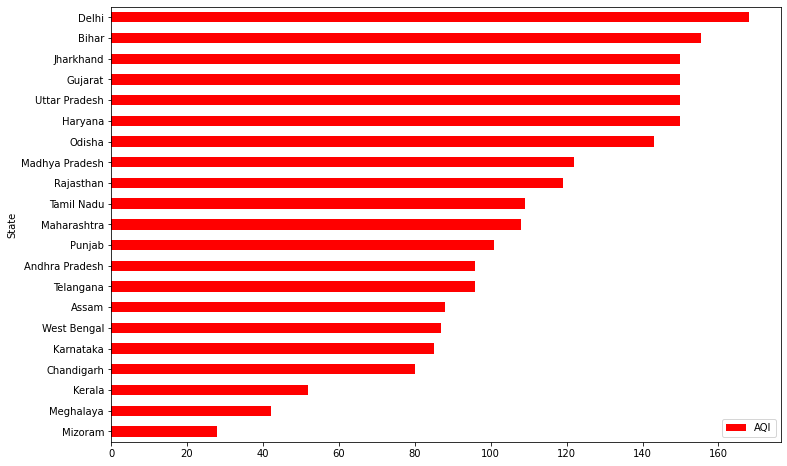

In [35]:
# 5- most polluted states 
df[['AQI', 'State']].groupby(['State']).median().sort_values("AQI", ascending = True).plot.barh(color="r",figsize=(12,8))

Hence, it can be concluded that most (5)polluted states are:
1. Delhi
2. Bihar
3. Haryana ---------|
4. Uttar Pradesh----|   
5. Gujarat----------|         These are having almost same AQI.
6. Jharkhand -------|

<AxesSubplot:ylabel='State'>

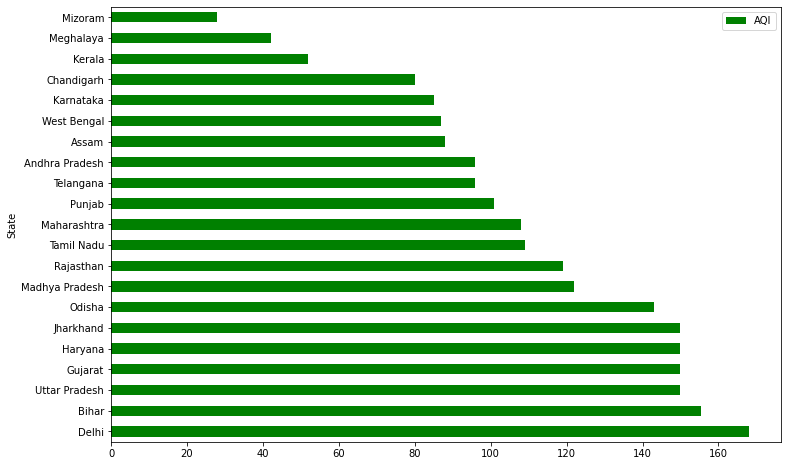

In [36]:
# 5 cleanest City
df[['AQI', 'State']].groupby(['State']).median().sort_values("AQI", ascending = False).plot.barh(color="g",figsize=(12,8))


Top 5 Cities with clean air:
1. Mizoram
2. Meghalaya
3. Kerala
4. Chandigarh
5. Karnataka

In [37]:
# Pie-chart to see the AQI_Bucket 
def piechart(d):
    p=(d).value_counts()/len(d)
    return plt.pie(p.values,labels=p.index,normalize="False")

([<matplotlib.patches.Wedge at 0x1e947a15520>,
 [Text(0.2434853144501309, 1.0727138023010243, 'Moderate'),
  Text(-1.0228388793326997, -0.4047229014096279, 'Satisfactory'),
  Text(0.0350681897717432, -1.099440867926117, 'Poor'),
  Text(0.6886147443501128, -0.8577935263591285, 'Good'),
  Text(0.9819916321231229, -0.49567371772181495, 'Very Poor'),
  Text(1.089055640302015, -0.15478311382824708, 'Severe')])

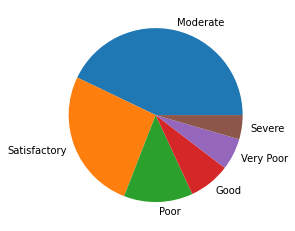

In [38]:
piechart(df["AQI_bucket"])

# conclusion:
From EDA, it was observed that during winter there is spike in AQI in delhi most.
Few states have active station status:Delhi, U.P 
Gujarat is most polluted but still air Quality of Delhi is more dangerous,as it contains harmful pollutants like(xylene and all),which are not used while calculating the Value but can create problem and is harmful to health.

# Model to give AQI_bucket with health impact


In [39]:
# importing the file created alreday
from aqi import AQI

In [40]:
output=AQI

In [42]:
AQI=int(input("Enter AQI: "))
output.AQI_bucket(AQI)

Enter AQI: 234


'AQI_bucket=Poor, May cause breathing discomfort to people on prolonged exposure, and discomfort to people with heart disease.Pregnant women are advised to stay at home. '




## Model

Algorithms are the methods to solve an objective of the datset. Machine learning models are able to evaluate future unknown data and make predictions or future insights. Therefore,which model to deploy depends upon our dataset and objective. 

1. Time Series(Most appropriate,since it includes date)
2. Random Forest Regression

In [43]:
# Random Forest Regression   
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108035 entries, 0 to 108034
Data columns (total 20 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Date         108035 non-null  object 
 1   StationId    108035 non-null  object 
 2   State        108035 non-null  object 
 3   StationName  108035 non-null  object 
 4   City         108035 non-null  object 
 5   PM2.5        108035 non-null  float64
 6   PM10         108035 non-null  float64
 7   NO           108035 non-null  float64
 8   NO2          108035 non-null  float64
 9   NOx          108035 non-null  float64
 10  NH3          108035 non-null  float64
 11  CO           108035 non-null  float64
 12  SO2          108035 non-null  float64
 13  O3           108035 non-null  float64
 14  Benzene      108035 non-null  float64
 15  Toluene      108035 non-null  float64
 16  Xylene       108035 non-null  float64
 17  Status       108035 non-null  int64  
 18  AQI          108035 non-

In [44]:
df=df.drop(["AQI_bucket"],axis=1)      #Since, it is determined on behalf of AQI.

In [45]:
encoder=preprocessing.LabelEncoder()
for i in df.columns:
    if isinstance(df[i][0],str):
        df[i]=encoder.fit_transform(df[i])

In [46]:
x=df.drop(["AQI"],axis=1)

In [47]:
y=df["AQI"]
y

0         116.0
1         127.0
2         129.0
3         135.0
4         138.0
          ...  
108030     31.0
108031     39.0
108032    214.0
108033     39.0
108034     36.0
Name: AQI, Length: 108035, dtype: float64

In [48]:
# Splitting dataset into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [49]:
regressor = RandomForestRegressor(max_depth=2,min_samples_split=9,n_estimators=75) #hypertuned by fixing leaf nodes: by deafault it is none
regressor.fit(x_train, y_train)

RandomForestRegressor(max_depth=2, min_samples_split=9, n_estimators=75)

In [50]:
#predicton from the model
y_pred=regressor.predict(x_test)

In [51]:
regressor.score(x_test,y_test) #check th score of the model

0.86562312097517

# RMSE
Calculating the rmse of our data set, to know about our model.

In [52]:
from sklearn.metrics import mean_squared_error

In [53]:
np.sqrt(mean_squared_error(y_test,y_pred))

41.18157623272819

To know, whether RMSE is good or not, we need to be aware about the range of our test data.

In [54]:
y.max()

1616.0

In [55]:
y.min()

5.0

In [56]:
y.describe()

count    108035.000000
mean        159.019420
std         112.613196
min           5.000000
25%          87.000000
50%         132.000000
75%         191.000000
max        1616.000000
Name: AQI, dtype: float64

Hence, we can see RMSE is smaller than the range.So, the model is not bad.

# Time Series 

In [57]:
# read dataset
da=pd.read_csv("new_Station.csv",index_col="Date",parse_dates=True)

In [58]:
da=da.drop(df.iloc[:,1:18],axis = 1)
da=da.drop(["AQI_bucket"],axis=1)

In [59]:
da=da.sort_index()
da

,AQI
Date,
2015-01-01,288.0
2015-01-01,94.0
2015-01-01,121.0
2015-01-01,92.0
2015-01-01,158.0
...,...
2020-07-01,111.0
2020-07-01,114.0
2020-07-01,143.0


In [60]:
df=da.resample(rule="MS").sum()

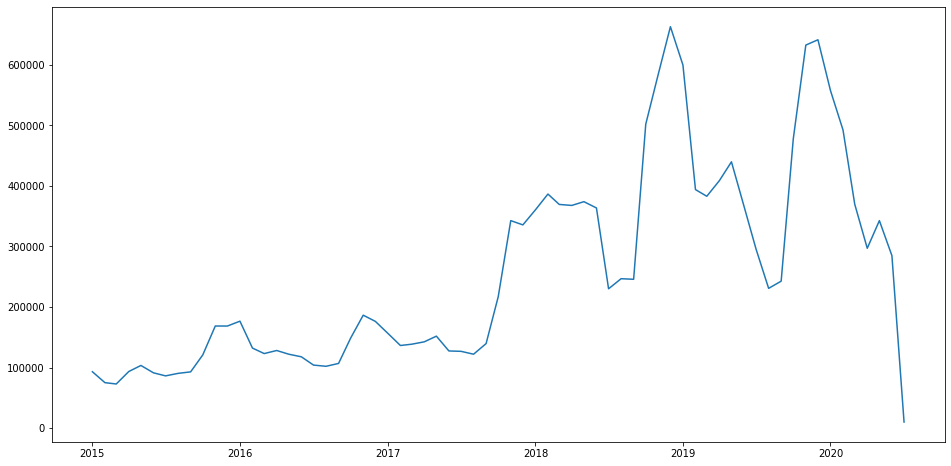

In [61]:
plt.figure(figsize=(16,8))
plt.plot(df)

In [62]:
# Check for Stationarity

from statsmodels.tsa.stattools import adfuller

def adf_test(x):
    dftest = adfuller(x, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    if dftest[1] <= 0.05:
        print("We reject the null hypothesis; it is stationary.")
    else:
        print("We accept the null hypothesis; it is seasonal.")

In [63]:
# calling function---> statistical test to check stationarity
adf_test(df["AQI"])

Test Statistic                 -1.166384
p-value                         0.687887
#Lags Used                     11.000000
Number of Observations Used    55.000000
Critical Value (1%)            -3.555273
Critical Value (5%)            -2.915731
Critical Value (10%)           -2.595670
dtype: float64
We accept the null hypothesis; it is seasonal.


In [70]:
auto_arima(y=df["AQI"],start_p=1,start_P=1,start_q=1,start_Q=1, seasonal=True, m=12, stepwise=True).summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   67
Model:             SARIMAX(1, 0, 0)x(1, 1, 0, 12)   Log Likelihood                -684.240
Date:                            Tue, 04 Jan 2022   AIC                           1374.480
Time:                                    11:56:28   BIC                           1380.502
Sample:                                         0   HQIC                          1376.809
                                             - 67                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9254      0.054     17.164      0.000       0.820       1.031
ar.S.L12      -0.5349      0.196     -2.729      0.006      -0.919      -0.151
sigma2      4.442e+09   1.01e-11    4.4e+20      0.000    4.44e+09    4.44e+09
===================================================================================
Ljung-Box (L1) (Q):                   1.04   Jarque-Bera (JB):                23.34
Prob(Q):                              0.31   Prob(JB):                         0.00
Heteroskedasticity (H):              10.71   Skew:                            -0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.67e+36. Standard errors may be unstable.
"""

In [71]:
# split it into train and test data
train = df["AQI"][:2018-12]
test = df["AQI"][2018-12:]

In [72]:
from statsmodels.tsa.statespace import sarimax

In [73]:
model=sarimax.SARIMAX(train,order=(0,1,0),seasonal_order=(1,1,0,12),trend="n")
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                AQI   No. Observations:                   67
Model:             SARIMAX(0, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -672.554
Date:                            Tue, 04 Jan 2022   AIC                           1349.107
Time:                                    12:00:04   BIC                           1353.085
Sample:                                01-01-2015   HQIC                          1350.642
                                     - 07-01-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.5361      0.197     -2.724      0.006      -0.922      -0.150
sigma2      4.645e+09   1.45e-11   3.21e+20      0.000    4.64e+09    4.64e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.52   Jarque-Bera (JB):                25.61
Prob(Q):                              0.47   Prob(JB):                         0.00
Heteroskedasticity (H):              12.88   Skew:                            -0.41
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

<AxesSubplot:xlabel='Date'>

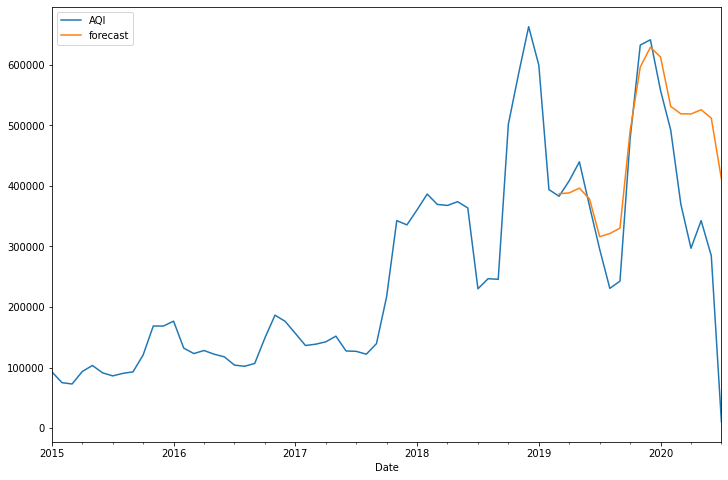

In [74]:
df["forecast"]=result.predict(start=50,end=100,dynamic=True)
df[["AQI","forecast"]].plot(figsize=(12,8))